# Figure 3

## Load packages

In [1]:
import scipy.io as io
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

## Load functions for simulations and plotting

In [2]:
from Golden_Ratio_functions import *

## Figure 3B: Target responses without sinusoidal gain.

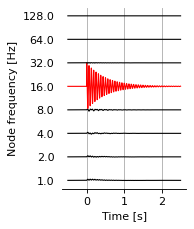

In [3]:
ratio   = 2
f_k     = ratio**np.arange(0,7+1)
network = {"f_k":f_k, "k_perturbed":4}
gain    = {"f_S":0, "g_S":0}

x,t = run_damped_coupled_harmonic_oscillators(network, gain)

f = plt.figure(figsize=(2, 3), dpi=80)
plot_model_traces(t,x,network,gain)
f.savefig("./PDFs/Figure-3B.pdf", bbox_inches='tight')

## Figure 3C: Target responses with sinusoidal gain at frequency 8 Hz.

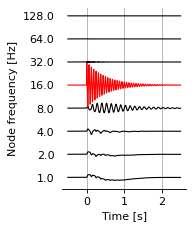

In [4]:
ratio   = 2
f_k     = ratio**np.arange(0,7+1)
network = {"f_k":f_k, "k_perturbed":4}
gain    = {"f_S":ratio**3, "g_S":50}

x,t = run_damped_coupled_harmonic_oscillators(network, gain)

f = plt.figure(figsize=(2, 3), dpi=80)
plot_model_traces(t,x,network,gain)
f.savefig("./PDFs/Figure-3C.pdf", bbox_inches='tight')

## Figure 3D (Part 1): Compute target response versus sinusoidal gain frequency, save it.
This part is slow, and iterates over a range of `f_S`.

In [ ]:
ratio   = 2
f_k     = ratio**np.arange(0,7+1)
network = {"f_k":f_k, "k_perturbed":4}

f_S     = np.arange(1,160,0.5)
g_S     = 50
A       = np.zeros([16,f_S.size])

for i in np.arange(f_S.size):

    print(["%.1f"% f_S[i]][0],end=' ')
    
    gain    = {"f_S":f_S[i], "g_S":g_S}
    x,t = run_damped_coupled_harmonic_oscillators(network, gain)
    
    amp   = np.abs(hilbert(x));
    i0    = np.where( (t>=0) & (t<=1.5) );
    A[:,i]= np.mean(amp[:,i0[0]],1)

res = {"A":A, "f_S":f_S, "g_S":g_S, "f_k":f_k, "network":network, "gain":gain}
io.savemat('Figure-3D.mat', res)

## Figure 3D (Part 2): Load target response versus sinusoidal gain frequency, plot it.

This part is fast.

In [ ]:
res = io.loadmat("Figure-3D.mat")
f   = plt.figure(figsize=(5, 3), dpi=80)
plot_gain_traces(res)
f.savefig("./PDFs/Figure-3D.pdf", bbox_inches='tight')